<a href="https://colab.research.google.com/github/nandishmadhu/Kaggle_Google_Brain/blob/validation_branch/GB_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import os
import pandas as pd


In [2]:
#drive.flush_and_unmount()
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
ls '/content/drive/MyDrive/Kaggle_Google_Brain/Data/'

sample_submission.csv  test.csv  test_updated.csv  train.csv  train_updated.csv


In [13]:
#Importing the files that were created during EDA/Feature Engineering

In [9]:
train=pd.read_csv('/content/drive/MyDrive/Kaggle_Google_Brain/Data/train_updated.csv')

In [10]:
test=pd.read_csv('/content/drive/MyDrive/Kaggle_Google_Brain/Data/test_updated.csv')

In [11]:
train

,id,breath_id,R,C,time_step,u_in,u_out,time_delta,breath_number,pressure
0,1,1,20,50,0.000000,0.083334,0,0.000000,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,0.033652,1,5.907794
2,3,1,20,50,0.067514,22.509278,0,0.033862,2,7.876254
3,4,1,20,50,0.101542,22.808822,0,0.034028,3,11.742872
4,5,1,20,50,0.135756,25.355850,0,0.034213,4,12.234987
...,...,...,...,...,...,...,...,...,...,...
6035995,6035996,125749,50,10,2.504603,1.489714,1,0.033412,75,3.869032
6035996,6035997,125749,50,10,2.537961,1.488497,1,0.033358,76,3.869032
6035997,6035998,125749,50,10,2.571408,1.558978,1,0.033447,77,3.798729
6035998,6035999,125749,50,10,2.604744,1.272663,1,0.033337,78,4.079938


In [12]:
test

,id,breath_id,R,C,time_step,u_in,u_out,time_delta,breath_number
0,1,0,5,20,0.000000,0.000000,0,0.000000,0
1,2,0,5,20,0.031904,7.515046,0,0.031904,1
2,3,0,5,20,0.063827,14.651675,0,0.031924,2
3,4,0,5,20,0.095751,21.230610,0,0.031924,3
4,5,0,5,20,0.127644,26.320956,0,0.031893,4
...,...,...,...,...,...,...,...,...,...
4023995,4023996,125748,20,10,2.530117,4.971245,1,0.033753,75
4023996,4023997,125748,20,10,2.563853,4.975709,1,0.033736,76
4023997,4023998,125748,20,10,2.597475,4.979468,1,0.033622,77
4023998,4023999,125748,20,10,2.631134,4.982648,1,0.033659,78


In [ ]:
## Exploring LSTM model

In [ ]:
# Approach1: #https://www.youtube.com/watch?v=4FmVIpcwl4k

In [14]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf



In [15]:

scaler=MinMaxScaler()

In [16]:
#Dropping the id and breath_id columns as they are global unique ID numbers and scaling might introduce negative learning for the model.
train_new=train.drop(['id','breath_id'],axis=1)
test_new=test.drop(['id','breath_id'],axis=1)

In [17]:
scaled_train=scaler.fit_transform(train_new)

In [18]:
scaled_train

array([[0.33333333, 1.        , 0.        , ..., 0.        , 0.        ,
        0.11591149],
       [0.33333333, 1.        , 0.01145713, ..., 0.13402319, 0.01265823,
        0.11696523],
       [0.33333333, 1.        , 0.02298568, ..., 0.13485877, 0.02531646,
        0.14646997],
       ...,
       [1.        , 0.        , 0.87545087, ..., 0.1332047 , 0.97468354,
        0.085353  ],
       [1.        , 0.        , 0.88680061, ..., 0.13276697, 0.98734177,
        0.08956797],
       [1.        , 0.        , 0.89812859, ..., 0.1325125 , 1.        ,
        0.08640674]])

In [31]:
features=scaled_train[:,0:-1] # Selecting the columns other than "pressure" as the features
target=scaled_train[:,-1] # Selecting the "pressure" column as the target

In [32]:
features.shape, target.shape

((6036000, 7), (6036000,))

In [33]:
#Comparing the first row of the scaled data with the features/target value to make sure the selection of array is right

In [30]:
scaled_train[0]

array([3.33333333e-01, 1.00000000e+00, 0.00000000e+00, 8.33340056e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.15911486e-01])

In [29]:
features[0], target[0]

(array([3.33333333e-01, 1.00000000e+00, 0.00000000e+00, 8.33340056e-04,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]), 0.11591148577449925)

In [20]:
len(train), len(test)

(6036000, 4024000)

In [34]:
TimeseriesGenerator(features, target, length=70, sampling_rate=10, batch_size=1)[0]

(array([[[3.33333333e-01, 1.00000000e+00, 0.00000000e+00, 8.33340056e-04,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [3.33333333e-01, 1.00000000e+00, 1.15644341e-01, 2.68667582e-01,
          0.00000000e+00, 1.35181610e-01, 1.26582278e-01],
         [3.33333333e-01, 1.00000000e+00, 2.31569858e-01, 2.07010462e-01,
          0.00000000e+00, 1.35889954e-01, 2.53164557e-01],
         [3.33333333e-01, 1.00000000e+00, 3.47706907e-01, 0.00000000e+00,
          1.00000000e+00, 1.34654625e-01, 3.79746835e-01],
         [3.33333333e-01, 1.00000000e+00, 4.63580556e-01, 0.00000000e+00,
          1.00000000e+00, 1.35470265e-01, 5.06329114e-01],
         [3.33333333e-01, 1.00000000e+00, 5.79517437e-01, 3.19777307e-02,
          1.00000000e+00, 1.35566167e-01, 6.32911392e-01],
         [3.33333333e-01, 1.00000000e+00, 6.95289459e-01, 4.67084510e-02,
          1.00000000e+00, 1.36060868e-01, 7.59493671e-01]]]),
 array([0.12961012]))

In [35]:
#Dividing the data to train and validation to ensure model is able to 
x_train, x_val, y_train, y_val = train_test_split(features, target, test_size=0.2, random_state=123, shuffle=False)

In [36]:
x_train.shape

(4828800, 7)

In [38]:
x_val.shape

(1207200, 7)

In [41]:

win_length=80 # 
batch_size=80 # No. of rows to be trained in each batch
num_features=7
train_generator= TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator= TimeseriesGenerator(x_val, y_val, length=win_length, sampling_rate=1, batch_size=batch_size)

In [42]:
train_generator[0]

(array([[[0.33333333, 1.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.33333333, 1.        , 0.01145713, ..., 0.        ,
          0.13402319, 0.01265823],
         [0.33333333, 1.        , 0.02298568, ..., 0.        ,
          0.13485877, 0.02531646],
         ...,
         [0.33333333, 1.        , 0.89259825, ..., 1.        ,
          0.13548736, 0.97468354],
         [0.33333333, 1.        , 0.90416431, ..., 1.        ,
          0.13529745, 0.98734177],
         [0.33333333, 1.        , 0.91574676, ..., 1.        ,
          0.13548926, 1.        ]],
 
        [[0.33333333, 1.        , 0.01145713, ..., 0.        ,
          0.13402319, 0.01265823],
         [0.33333333, 1.        , 0.02298568, ..., 0.        ,
          0.13485877, 0.02531646],
         [0.33333333, 1.        , 0.03457065, ..., 0.        ,
          0.13551869, 0.03797468],
         ...,
         [0.33333333, 1.        , 0.90416431, ..., 1.        ,
          0.13529745, 0.

In [43]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(12, input_shape=(win_length, num_features), return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
#model.add(tf.keras.layers.LSTM(12, return_sequences=True))
#model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
#model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(6, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 80, 12)            960       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 80, 12)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 6)                 456       
_________________________________________________________________
dropout (Dropout)            (None, 6)                 0         
_________________________________________________________________
dense (Dense)                (None, 1)                 7         
Total params: 1,423
Trainable params: 1,423
Non-trainable params: 0
_________________________________________________________________


In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, mode='min')
model.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(), metrics=[tf.metrics.MeanAbsoluteError()])

history=model.fit_generator(train_generator,epochs=1, validation_data=test_generator, shuffle=False, callbacks=[early_stopping])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


 3401/60359 [>.............................] - ETA: 58:48 - loss: 0.0053 - mean_absolute_error: 0.0440

In [ ]:
model.evaluate_generator(test_generator, verbose=0)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning:

`Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.



[0.0002455645299050957, 0.011780623346567154]

In [ ]:
predictions=model.predict_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning:

`Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.



In [ ]:
predictions.shape[0]

1207120

In [ ]:
predictions

array([[0.10278767],
       [0.13540737],
       [0.15879878],
       ...,
       [0.10686669],
       [0.10636425],
       [0.106952  ]], dtype=float32)

In [ ]:
y_test

array([0.07270811, 0.07692308, 0.085353  , ..., 0.085353  , 0.08956797,
       0.08640674])

In [ ]:
x_test

array([[1.        , 0.        , 0.        , 0.0212194 , 0.        ,
        0.07270811],
       [1.        , 0.        , 0.01140079, 0.03040999, 0.        ,
        0.07692308],
       [1.        , 0.        , 0.02278194, 0.03865732, 0.        ,
        0.085353  ],
       ...,
       [1.        , 0.        , 0.87545087, 0.01558978, 1.        ,
        0.085353  ],
       [1.        , 0.        , 0.88680061, 0.01272663, 1.        ,
        0.08956797],
       [1.        , 0.        , 0.89812859, 0.01482739, 1.        ,
        0.08640674]])

In [ ]:
x_test[:,:-1][win_length:]

array([[0.        , 0.        , 0.        , 0.27893426, 0.        ],
       [0.        , 0.        , 0.01086149, 0.28355812, 0.        ],
       [0.        , 0.        , 0.02170829, 0.27429018, 0.        ],
       ...,
       [1.        , 0.        , 0.87545087, 0.01558978, 1.        ],
       [1.        , 0.        , 0.88680061, 0.01272663, 1.        ],
       [1.        , 0.        , 0.89812859, 0.01482739, 1.        ]])

In [ ]:
df_pred=pd.concat([pd.DataFrame(x_test[:,:-1][win_length:]),pd.DataFrame(predictions)], axis=1)
rev_trans=scaler.inverse_transform(df_pred)

In [ ]:
rev_trans

array([[5.00000000e+00, 1.00000000e+01, 0.00000000e+00, 2.78934262e+01,
        0.00000000e+00, 4.96191329e+00],
       [5.00000000e+00, 1.00000000e+01, 3.19027901e-02, 2.83558125e+01,
        0.00000000e+00, 7.13819369e+00],
       [5.00000000e+00, 1.00000000e+01, 6.37624264e-02, 2.74290179e+01,
        0.00000000e+00, 8.69879226e+00],
       ...,
       [5.00000000e+01, 1.00000000e+01, 2.57140756e+00, 1.55897786e+00,
        1.00000000e+00, 5.23405279e+00],
       [5.00000000e+01, 1.00000000e+01, 2.60474443e+00, 1.27266322e+00,
        1.00000000e+00, 5.20053131e+00],
       [5.00000000e+01, 1.00000000e+01, 2.63801742e+00, 1.48273915e+00,
        1.00000000e+00, 5.23974384e+00]])

In [ ]:
df_final=train[predictions.shape[0]*-1:]

In [ ]:
df_final

,id,breath_id,R,C,time_step,u_in,u_out,pressure
4828880,4828881,100617,5,10,0.000000,27.893426,0,6.118700
4828881,4828882,100617,5,10,0.031903,28.355812,0,7.876254
4828882,4828883,100617,5,10,0.063762,27.429018,0,9.493203
4828883,4828884,100617,5,10,0.095700,26.269003,0,11.250757
4828884,4828885,100617,5,10,0.128525,24.888696,0,13.148915
...,...,...,...,...,...,...,...,...
6035995,6035996,125749,50,10,2.504603,1.489714,1,3.869032
6035996,6035997,125749,50,10,2.537961,1.488497,1,3.869032
6035997,6035998,125749,50,10,2.571408,1.558978,1,3.798729
6035998,6035999,125749,50,10,2.604744,1.272663,1,4.079938


In [ ]:
df_final['Pressure_pred']=rev_trans[:,-1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_final

,id,breath_id,R,C,time_step,u_in,u_out,pressure,Pressure_pred
4828880,4828881,100617,5,10,0.000000,27.893426,0,6.118700,4.961913
4828881,4828882,100617,5,10,0.031903,28.355812,0,7.876254,7.138194
4828882,4828883,100617,5,10,0.063762,27.429018,0,9.493203,8.698792
4828883,4828884,100617,5,10,0.095700,26.269003,0,11.250757,10.546460
4828884,4828885,100617,5,10,0.128525,24.888696,0,13.148915,12.378305
...,...,...,...,...,...,...,...,...,...
6035995,6035996,125749,50,10,2.504603,1.489714,1,3.869032,5.288497
6035996,6035997,125749,50,10,2.537961,1.488497,1,3.869032,5.256998
6035997,6035998,125749,50,10,2.571408,1.558978,1,3.798729,5.234053
6035998,6035999,125749,50,10,2.604744,1.272663,1,4.079938,5.200531


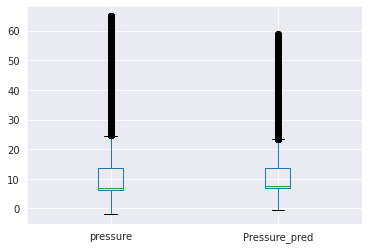

In [ ]:
df_final[['pressure','Pressure_pred']].boxplot()

In [ ]:
df_final.describe()

,id,breath_id,R,C,time_step,u_in,u_out,pressure,Pressure_pred
count,1.207120e+06,1.207120e+06,1.207120e+06,1.207120e+06,1.207120e+06,1.207120e+06,1.207120e+06,1.207120e+06,1.207120e+06
mean,5.432440e+06,1.131703e+05,2.699649e+01,2.634635e+01,1.307101e+00,7.321864e+00,6.203874e-01,1.121980e+01,1.135985e+01
std,3.484657e+05,7.258938e+03,1.955455e+01,1.720375e+01,7.659118e-01,1.340373e+01,4.852907e-01,8.112974e+00,7.284823e+00
min,4.828881e+06,1.006170e+05,5.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,-1.895744e+00,-4.406874e-01
25%,5.130661e+06,1.068940e+05,5.000000e+00,1.000000e+01,6.428680e-01,3.833389e-01,0.000000e+00,6.329607e+00,6.919769e+00
50%,5.432440e+06,1.131810e+05,2.000000e+01,2.000000e+01,1.308057e+00,4.397409e+00,1.000000e+00,7.032628e+00,7.543601e+00
75%,5.734220e+06,1.194560e+05,5.000000e+01,5.000000e+01,1.965396e+00,4.984098e+00,1.000000e+00,1.364103e+01,1.351070e+01
max,6.036000e+06,1.257490e+05,5.000000e+01,5.000000e+01,2.928005e+00,1.000000e+02,1.000000e+00,6.482099e+01,5.894410e+01


In [ ]:
######################## predicted within the original "train" data. Should rename the "test" data as "validation" data. As we have another set of test data provided in the competition.
######################## Prediction of actual test data needs to be completed before submitting. Also, need to relook at parameters & no. of layers to improve model accuracy.

In [ ]:
################################# Below code is work in progress ###################################

In [ ]:
#There are 75450 unique breath IDs and for each breath ID there are 80 samples/rows of data
len(train['breath_id'].unique())

75450

In [ ]:
#No. of entries per breath_id (we see from the samples that it is 80 rows per breath ID)
per_breath_id=80

In [ ]:
#Number of breaths for which pressure needs to be predicted.... We will consider this as one (pressure to be predicted for one breath)
predict_duration=1

In [ ]:
#Train, Validation split

In [ ]:
#Total rows to be predicted
predict_pressure_for=per_breath_id*predict_duration

In [ ]:
tempdf=train[train['breath_id']<5]

In [ ]:
tempdf

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987
...,...,...,...,...,...,...,...,...
315,316,4,50,50,2.400609,4.946119,1,7.032628
316,317,4,50,50,2.432266,4.954007,1,6.540513
317,318,4,50,50,2.464062,4.960767,1,6.399909
318,319,4,50,50,2.495845,4.966532,1,6.962326


In [ ]:
# importing libraries
import numpy as np
import time
import matplotlib.pyplot as plt

In [ ]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True): # n_in - timesteps in past,n_out - future timestep
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [ ]:
reframed2 = series_to_supervised(train, 1, 2)

In [ ]:
reframed2

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t),var1(t+1),var2(t+1),var3(t+1),var4(t+1),var5(t+1),var6(t+1),var7(t+1),var8(t+1)
1,1.0,1.0,20.0,50.0,0.000000,0.083334,0.0,5.837492,2,1,20,50,0.033652,18.383041,0,5.907794,3.0,1.0,20.0,50.0,0.067514,22.509278,0.0,7.876254
2,2.0,1.0,20.0,50.0,0.033652,18.383041,0.0,5.907794,3,1,20,50,0.067514,22.509278,0,7.876254,4.0,1.0,20.0,50.0,0.101542,22.808822,0.0,11.742872
3,3.0,1.0,20.0,50.0,0.067514,22.509278,0.0,7.876254,4,1,20,50,0.101542,22.808822,0,11.742872,5.0,1.0,20.0,50.0,0.135756,25.355850,0.0,12.234987
4,4.0,1.0,20.0,50.0,0.101542,22.808822,0.0,11.742872,5,1,20,50,0.135756,25.355850,0,12.234987,6.0,1.0,20.0,50.0,0.169698,27.259866,0.0,12.867706
5,5.0,1.0,20.0,50.0,0.135756,25.355850,0.0,12.234987,6,1,20,50,0.169698,27.259866,0,12.867706,7.0,1.0,20.0,50.0,0.203708,27.127486,0.0,14.695562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035994,6035994.0,125749.0,50.0,10.0,2.437786,1.353205,1.0,4.009636,6035995,125749,50,10,2.471192,1.420711,1,3.939334,6035996.0,125749.0,50.0,10.0,2.504603,1.489714,1.0,3.869032
6035995,6035995.0,125749.0,50.0,10.0,2.471192,1.420711,1.0,3.939334,6035996,125749,50,10,2.504603,1.489714,1,3.869032,6035997.0,125749.0,50.0,10.0,2.537961,1.488497,1.0,3.869032
6035996,6035996.0,125749.0,50.0,10.0,2.504603,1.489714,1.0,3.869032,6035997,125749,50,10,2.537961,1.488497,1,3.869032,6035998.0,125749.0,50.0,10.0,2.571408,1.558978,1.0,3.798729
6035997,6035997.0,125749.0,50.0,10.0,2.537961,1.488497,1.0,3.869032,6035998,125749,50,10,2.571408,1.558978,1,3.798729,6035999.0,125749.0,50.0,10.0,2.604744,1.272663,1.0,4.079938


In [ ]:
#Split train and Test data
train_size = int(len(train) * 0.6)
values = reframed2.values
train = values[:train_size, :]
test = values[train_size:, :]

# split into input and outputs
Xtrain, Ytrain = train[:, :-1], train[:, -1]
Xtest, Ytest = test[:, :-1], test[:, -1]

### RNN needs 3D input
# reshape input to be 3D [samples, timesteps, features]
Xtrain = Xtrain.reshape((Xtrain.shape[0], 1, Xtrain.shape[1]))
Xtest = Xtest.reshape((Xtest.shape[0], 1, Xtest.shape[1]))
print(Xtrain.shape, Ytrain.shape, Xtest.shape, Ytest.shape)

(3621600, 1, 23) (3621600,) (2414398, 1, 23) (2414398,)


In [ ]:
test

array([[3.62160100e+06, 7.54890000e+04, 5.00000000e+00, ...,
        2.92576609e+01, 0.00000000e+00, 8.50897323e+00],
       [3.62160200e+06, 7.54890000e+04, 5.00000000e+00, ...,
        3.02704872e+01, 0.00000000e+00, 9.21199469e+00],
       [3.62160300e+06, 7.54890000e+04, 5.00000000e+00, ...,
        3.23937462e+01, 0.00000000e+00, 9.77441185e+00],
       ...,
       [6.03599600e+06, 1.25749000e+05, 5.00000000e+01, ...,
        1.55897786e+00, 1.00000000e+00, 3.79872949e+00],
       [6.03599700e+06, 1.25749000e+05, 5.00000000e+01, ...,
        1.27266322e+00, 1.00000000e+00, 4.07993807e+00],
       [6.03599800e+06, 1.25749000e+05, 5.00000000e+01, ...,
        1.48273915e+00, 1.00000000e+00, 3.86903163e+00]])

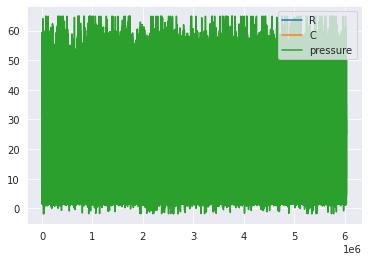

In [ ]:
train[['R','C','pressure']].plot()

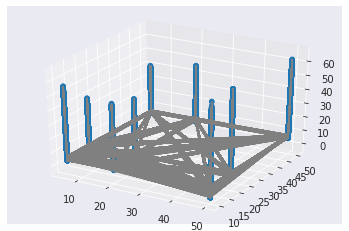

In [ ]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
z = train['pressure']
x = train['R']
y = train['C']
ax.plot3D(x,y,z, 'gray')



In [ ]:
# Data for three-dimensional scattered points

ax.scatter3D(x,y,z, cmap='Greens');

NameError: ignored